In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable better resolution visuals
%matplotlib inline
plt.style.use('ggplot')  # or try 'seaborn-darkgrid'

df = pd.read_excel("tslahistorical.xlsx")

# Optional: view original columns
# print(df.columns)

# Rename & filter
df = df.rename(columns={'Close/Last': 'Close'})
df = df[['Date', 'Close', 'Volume', 'Open', 'High', 'Low']]

# Clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Daily Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

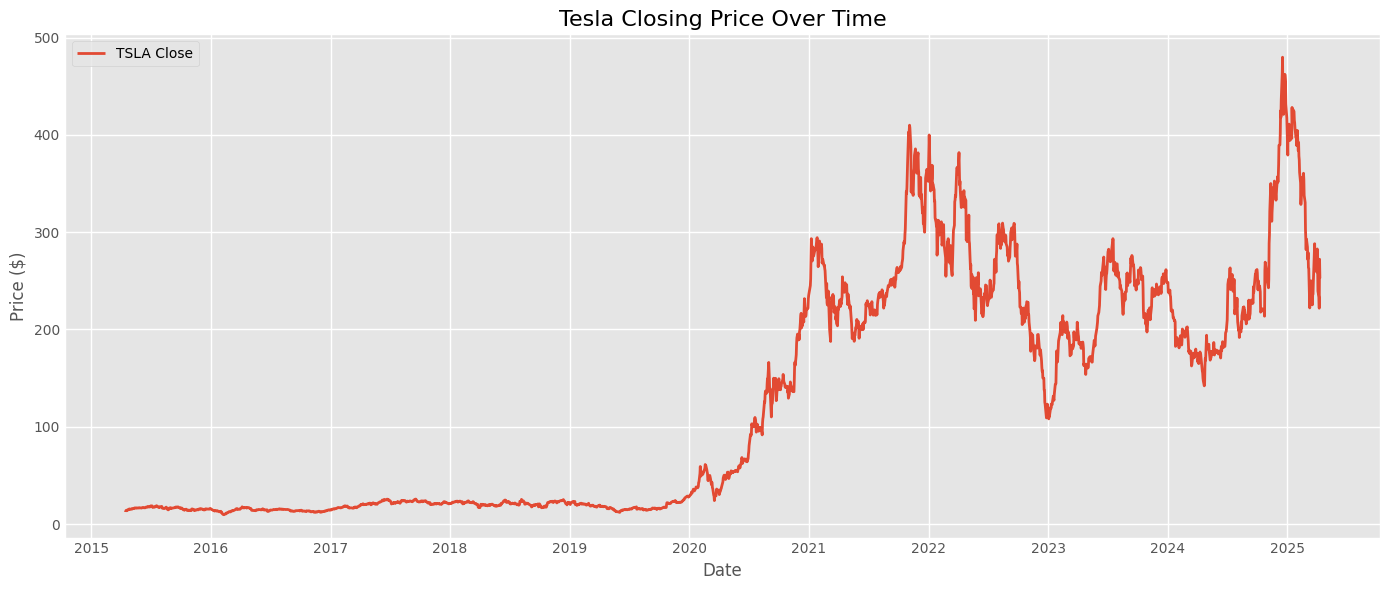

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='TSLA Close', linewidth=2)
plt.title("Tesla Closing Price Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

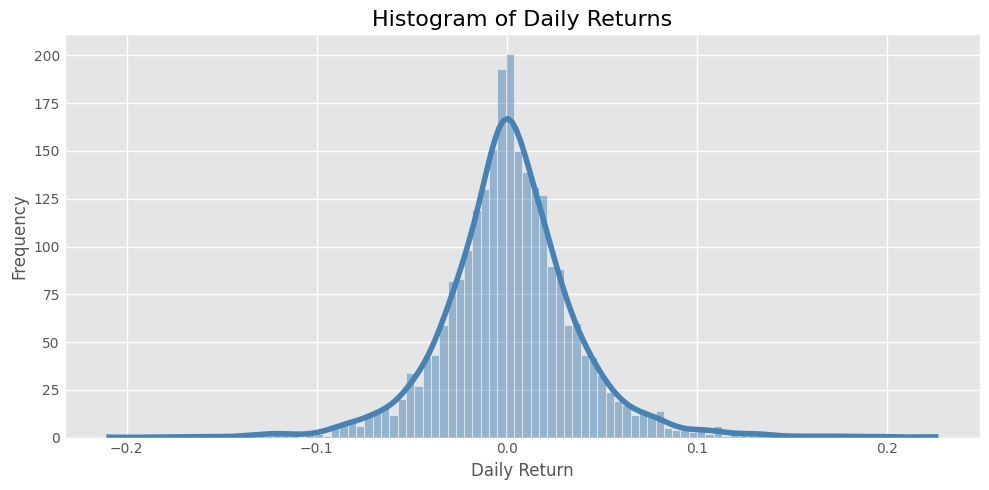

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='steelblue')
plt.title("Histogram of Daily Returns", fontsize=16)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

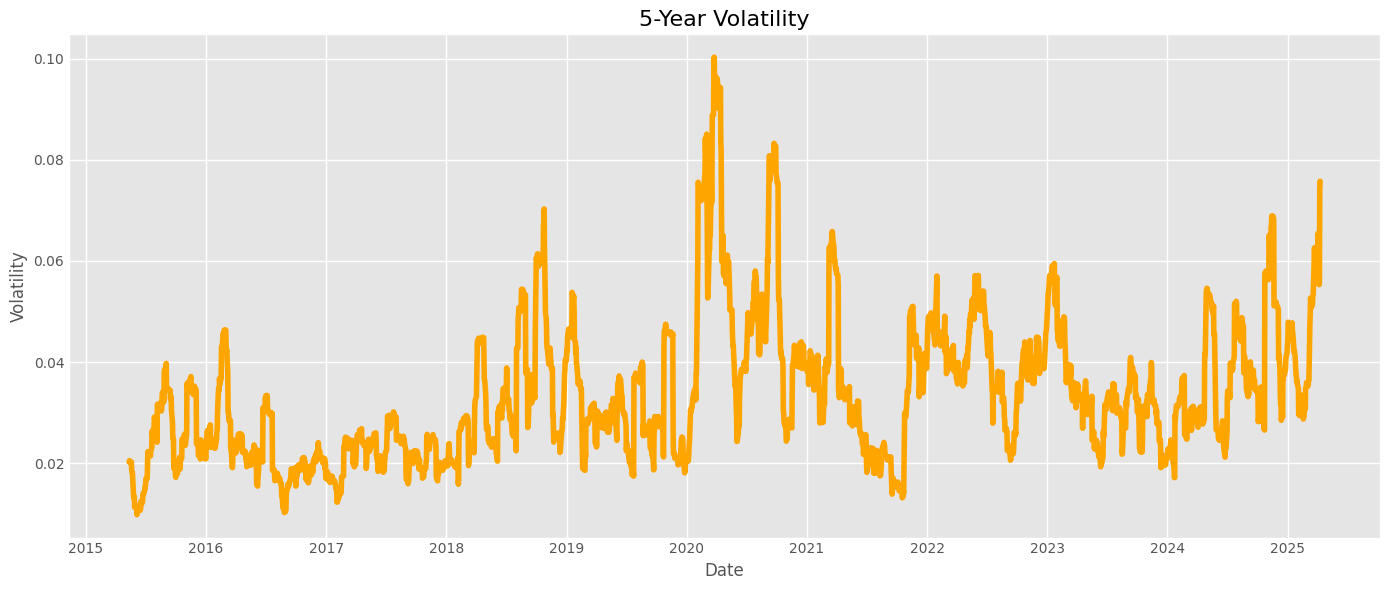

In [14]:
df['Volatility_20d'] = df['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volatility_20d'], color='orange')
plt.title("5-Year Volatility", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()

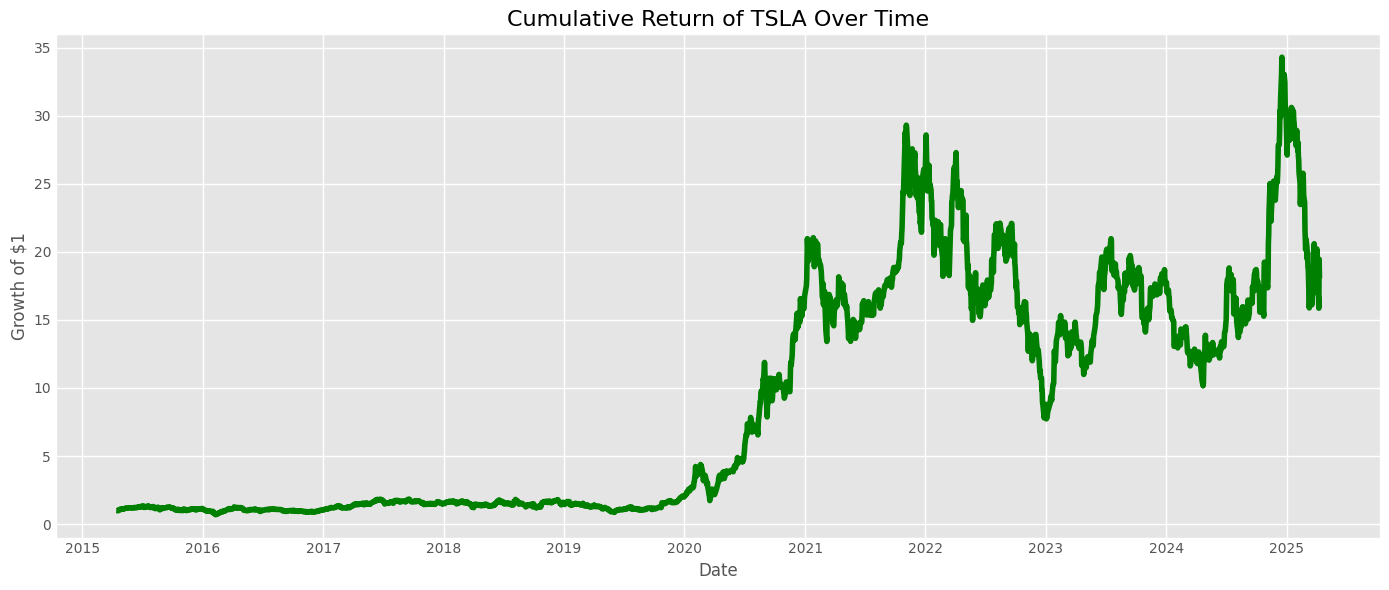

In [15]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Cumulative Return'], color='green')
plt.title("Cumulative Return of TSLA Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
plt.style.use('fivethirtyeight')  # or 'bmh', 'classic', 'seaborn-dark'